In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cost_estimation(x, y):
    n = np.size(x)
    mx, my = np.mean(x), np.mean(y)
    #Cross deviation and deviation
    SS_xy = np.sum(x*y) - n*my*mx
    SS_xx = np.sum(x*x) - n*mx*mx
    b1 = SS_xy / SS_xx
    b0 = my - mx*b1
    return b0, b1

In [3]:
x = np.arange(10)
y = np.array([100, 300, 350, 500, 750, 800, 850, 920, 1030, 1220])
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 100  300  350  500  750  800  850  920 1030 1220]


In [4]:
b = cost_estimation(x, y)
print(b)

(160.0, 116.0)


In [5]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color='r')
    plt.show()

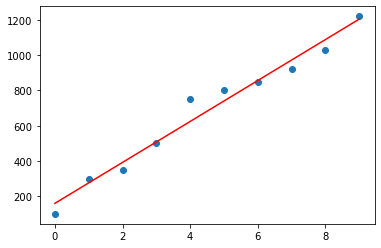

In [6]:
plot_regression_line(x, y, b)

In [7]:
y_pred = b[0] + b[1]*12
print(y_pred)

1552.0


In [8]:
sse = sum([val**2 for val in (y - y_pred)])
print(sse)

8710960.0


In [9]:
mse = sse/np.size(y)
print(mse)

871096.0


### Gradient Descent

In [10]:
def gradient_descent(x, y):
    #y = mx + c      --> Linear line equation
    m = c = 0        #Initial value of m and c
    alpha = 0.08     #Learning rate
    iteration = 1000
    n = len(x)
    for i in range(iteration):
        y_pred = m*x + c
        cost = 1/n*sum([val**2 for val in (y - y_pred)])
        m_deviation = -(2/n)*sum(x*(y - y_pred))
        c_deviation = -(2/n)*sum(y - y_pred)
        m = m - alpha*m_deviation
        c = c - alpha*c_deviation
        if i%10 == 0:
            plt.plot(x, y_pred, color='b')
        print('Iteration : {}, m : {}, c : {}, cost : {}'.format(i, m, c, cost))
    plt.plot(x, y_pred, color='r')
    print(m, c, cost)

In [11]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 10, 12, 14])

Iteration : 0, m : 5.344, c : 1.5360000000000003, cost : 102.80000000000001
Iteration : 1, m : 0.5452799999999991, c : 0.26112, cost : 82.08089600000004
Iteration : 2, m : 4.8042496, c : 1.4936064000000007, cost : 65.55490979840005
Iteration : 3, m : 0.9758392319999993, c : 0.4845895680000003, cost : 52.37264802676739
Iteration : 4, m : 4.369759191040001, c : 1.4746524057600006, cost : 41.85681999126229
Iteration : 5, m : 1.3151498600447993, c : 0.6772236091392, cost : 33.46736425216795
Iteration : 6, m : 4.019418773979137, c : 1.4735958988554245, cost : 26.773641777115415
Iteration : 7, m : 1.5819157003252515, c : 0.8444995435285708, cost : 21.43226372677739
Iteration : 8, m : 3.736384286859095, c : 1.4860600804078787, cost : 17.16941209478757
Iteration : 9, m : 1.7910391033913062, c : 0.9908260098502526, cost : 13.766742789113444
Iteration : 10, m : 3.5072137966944865, c : 1.508595078646385, cost : 11.050145224569636
Iteration : 11, m : 1.954391876761925, c : 1.11975724364961, cost :

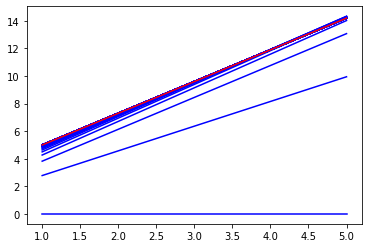

In [12]:
gradient_descent(x, y)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [15]:
#Intercept and slope
lr.intercept_, lr.coef_

(2.6999999999999975, array([2.3]))

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y, lr.predict(x.reshape(-1, 1)))

0.06

In [18]:
y_pred = lr.predict(x.reshape(-1, 1))
print(y_pred)

[ 5.   7.3  9.6 11.9 14.2]


In [19]:
print(y)

[ 5  7 10 12 14]


In [20]:
print(y - y_pred)

[ 1.77635684e-15 -3.00000000e-01  4.00000000e-01  1.00000000e-01
 -2.00000000e-01]


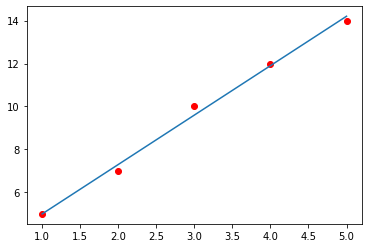

In [21]:
plt.scatter(x, y, color='red')
plt.plot(x, y_pred)